In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


### train 파일 전처리 및 학습

####    1. train 파일 전처리

In [2]:
tr = pd.read_csv('./train.csv', encoding = 'cp949')
tr.head()

,Unnamed: 0,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,세정기_Avg,...,소입로 온도 4 Zone_Std,솔트 컨베이어 온도 1 Zone_Avg,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std,불량단계
0,97,69.497726,3.274577,20.310463,3.490991,99.999143,0.435237,100.001123,0.401438,67.864965,...,0.304168,284.699659,9.601850,280.411936,6.940009,332.111266,0.152253,332.712474,0.153026,안정
1,125,68.776700,3.548587,16.547672,4.161717,100.077760,0.394062,100.107134,0.291589,69.614220,...,0.303700,285.007150,9.239152,280.646734,6.650701,332.123215,0.225985,332.093658,0.329912,위험
2,11,73.502913,2.645737,21.218347,2.218216,100.006615,0.387797,99.992686,0.281373,66.220995,...,0.402050,283.120448,9.426413,279.110908,6.064772,332.182887,0.099322,332.407261,0.107440,안정
3,129,68.062513,3.439085,4.366498,3.727635,100.040387,0.418439,100.139576,0.334492,69.242707,...,0.360325,285.074759,9.475964,280.790056,6.699134,332.277923,0.121808,332.261568,0.184196,안정
4,48,68.820299,3.946638,19.902113,3.765778,100.071930,0.367971,100.097453,0.291788,65.512487,...,0.211795,284.166005,9.847216,279.587268,6.606966,331.943223,0.189118,332.503069,0.359428,안정


In [3]:
 # 불량단계의 종속변수를 1(안정) 과 0(위험)으로 변환
tr['target'] = tr['불량단계'].map({'안정':1, '위험':0})
tr.head()


,Unnamed: 0,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,세정기_Avg,...,솔트 컨베이어 온도 1 Zone_Avg,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std,불량단계,target
0,97,69.497726,3.274577,20.310463,3.490991,99.999143,0.435237,100.001123,0.401438,67.864965,...,284.699659,9.601850,280.411936,6.940009,332.111266,0.152253,332.712474,0.153026,안정,1
1,125,68.776700,3.548587,16.547672,4.161717,100.077760,0.394062,100.107134,0.291589,69.614220,...,285.007150,9.239152,280.646734,6.650701,332.123215,0.225985,332.093658,0.329912,위험,0
2,11,73.502913,2.645737,21.218347,2.218216,100.006615,0.387797,99.992686,0.281373,66.220995,...,283.120448,9.426413,279.110908,6.064772,332.182887,0.099322,332.407261,0.107440,안정,1
3,129,68.062513,3.439085,4.366498,3.727635,100.040387,0.418439,100.139576,0.334492,69.242707,...,285.074759,9.475964,280.790056,6.699134,332.277923,0.121808,332.261568,0.184196,안정,1
4,48,68.820299,3.946638,19.902113,3.765778,100.071930,0.367971,100.097453,0.291788,65.512487,...,284.166005,9.847216,279.587268,6.606966,331.943223,0.189118,332.503069,0.359428,안정,1


In [4]:
#  데이터 탐색
tr.isna().sum() #  결측값 없음 확인

Unnamed: 0               0
건조 1존 OP_Avg             0
건조 1존 OP_Std             0
건조 2존 OP_Avg             0
건조 2존 OP_Std             0
건조로 온도 1 Zone_Avg        0
건조로 온도 1 Zone_Std        0
건조로 온도 2 Zone_Avg        0
건조로 온도 2 Zone_Std        0
세정기_Avg                  0
세정기_Std                  0
소입1존 OP_Avg              0
소입1존 OP_Std              0
소입2존 OP_Avg              0
소입2존 OP_Std              0
소입3존 OP_Avg              0
소입3존 OP_Std              0
소입4존 OP_Avg              0
소입4존 OP_Std              0
소입로 CP 값_Avg             0
소입로 CP 값_Std             0
소입로 온도 1 Zone_Avg        0
소입로 온도 1 Zone_Std        0
소입로 온도 2 Zone_Avg        0
소입로 온도 2 Zone_Std        0
소입로 온도 3 Zone_Avg        0
소입로 온도 3 Zone_Std        0
소입로 온도 4 Zone_Avg        0
소입로 온도 4 Zone_Std        0
솔트 컨베이어 온도 1 Zone_Avg    0
솔트 컨베이어 온도 1 Zone_Std    0
솔트 컨베이어 온도 2 Zone_Avg    0
솔트 컨베이어 온도 2 Zone_Std    0
솔트조 온도 1 Zone_Avg        0
솔트조 온도 1 Zone_Std        0
솔트조 온도 2 Zone_Avg        0
솔트조 온도 2 Zone_Std        0
불

In [5]:
columns_to_delete = ['Unnamed: 0','불량단계']
tr = tr.drop(columns = columns_to_delete, axis = 1)
tr.head()


,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,세정기_Avg,세정기_Std,...,소입로 온도 4 Zone_Std,솔트 컨베이어 온도 1 Zone_Avg,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std,target
0,69.497726,3.274577,20.310463,3.490991,99.999143,0.435237,100.001123,0.401438,67.864965,0.566335,...,0.304168,284.699659,9.601850,280.411936,6.940009,332.111266,0.152253,332.712474,0.153026,1
1,68.776700,3.548587,16.547672,4.161717,100.077760,0.394062,100.107134,0.291589,69.614220,0.812141,...,0.303700,285.007150,9.239152,280.646734,6.650701,332.123215,0.225985,332.093658,0.329912,0
2,73.502913,2.645737,21.218347,2.218216,100.006615,0.387797,99.992686,0.281373,66.220995,0.754956,...,0.402050,283.120448,9.426413,279.110908,6.064772,332.182887,0.099322,332.407261,0.107440,1
3,68.062513,3.439085,4.366498,3.727635,100.040387,0.418439,100.139576,0.334492,69.242707,1.435071,...,0.360325,285.074759,9.475964,280.790056,6.699134,332.277923,0.121808,332.261568,0.184196,1
4,68.820299,3.946638,19.902113,3.765778,100.071930,0.367971,100.097453,0.291788,65.512487,0.348773,...,0.211795,284.166005,9.847216,279.587268,6.606966,331.943223,0.189118,332.503069,0.359428,1


In [6]:
# 파생변수 생성 : 공정별  range(Max-Min)
tr['건조 존 OP_Range'] = (tr['건조 1존 OP_Avg']+tr['건조 2존 OP_Avg']) / 2    

tr['건조로 온도 Zone_Range']=(tr['건조로 온도 1 Zone_Avg']+tr['건조로 온도 2 Zone_Avg']) / 2 

tr['소입 존 OP_Min'] = tr[['소입1존 OP_Avg','소입2존 OP_Avg','소입3존 OP_Avg','소입4존 OP_Avg']].min(axis=1)
tr['소입 존 OP_Max'] = tr[['소입1존 OP_Avg','소입2존 OP_Avg','소입3존 OP_Avg','소입4존 OP_Avg']].max(axis=1)
tr['소입 존 OP_Range'] = np.abs(tr['소입 존 OP_Max'] - tr['소입 존 OP_Min'])

tr['소입로 온도 Zone_Min'] = tr[['소입로 온도 1 Zone_Avg','소입로 온도 2 Zone_Avg','소입로 온도 3 Zone_Avg','소입로 온도 4 Zone_Avg']].min(axis=1)
tr['소입로 온도 Zone_Max'] = tr[['소입로 온도 1 Zone_Avg','소입로 온도 2 Zone_Avg','소입로 온도 3 Zone_Avg','소입로 온도 4 Zone_Avg']].max(axis=1)
tr['소입로 온도 Zone_Range'] = np.abs(tr['소입로 온도 Zone_Max'] - tr['소입로 온도 Zone_Min'])

tr['솔트 컨베이어 온도 Zone_Range'] = (tr['솔트 컨베이어 온도 1 Zone_Avg']+tr['솔트 컨베이어 온도 2 Zone_Avg']) / 2    

tr['솔트조 온도 Zone_Range']=(tr['솔트조 온도 1 Zone_Avg']+tr['솔트조 온도 2 Zone_Avg']) / 2 
  

In [7]:
tr = tr.sort_index(axis=1)

columns = list(tr.columns)
columns


['target',
 '건조 1존 OP_Avg',
 '건조 1존 OP_Std',
 '건조 2존 OP_Avg',
 '건조 2존 OP_Std',
 '건조 존 OP_Range',
 '건조로 온도 1 Zone_Avg',
 '건조로 온도 1 Zone_Std',
 '건조로 온도 2 Zone_Avg',
 '건조로 온도 2 Zone_Std',
 '건조로 온도 Zone_Range',
 '세정기_Avg',
 '세정기_Std',
 '소입 존 OP_Max',
 '소입 존 OP_Min',
 '소입 존 OP_Range',
 '소입1존 OP_Avg',
 '소입1존 OP_Std',
 '소입2존 OP_Avg',
 '소입2존 OP_Std',
 '소입3존 OP_Avg',
 '소입3존 OP_Std',
 '소입4존 OP_Avg',
 '소입4존 OP_Std',
 '소입로 CP 값_Avg',
 '소입로 CP 값_Std',
 '소입로 온도 1 Zone_Avg',
 '소입로 온도 1 Zone_Std',
 '소입로 온도 2 Zone_Avg',
 '소입로 온도 2 Zone_Std',
 '소입로 온도 3 Zone_Avg',
 '소입로 온도 3 Zone_Std',
 '소입로 온도 4 Zone_Avg',
 '소입로 온도 4 Zone_Std',
 '소입로 온도 Zone_Max',
 '소입로 온도 Zone_Min',
 '소입로 온도 Zone_Range',
 '솔트 컨베이어 온도 1 Zone_Avg',
 '솔트 컨베이어 온도 1 Zone_Std',
 '솔트 컨베이어 온도 2 Zone_Avg',
 '솔트 컨베이어 온도 2 Zone_Std',
 '솔트 컨베이어 온도 Zone_Range',
 '솔트조 온도 1 Zone_Avg',
 '솔트조 온도 1 Zone_Std',
 '솔트조 온도 2 Zone_Avg',
 '솔트조 온도 2 Zone_Std',
 '솔트조 온도 Zone_Range']

In [8]:
columns.remove('target')
print(columns)


['건조 1존 OP_Avg', '건조 1존 OP_Std', '건조 2존 OP_Avg', '건조 2존 OP_Std', '건조 존 OP_Range', '건조로 온도 1 Zone_Avg', '건조로 온도 1 Zone_Std', '건조로 온도 2 Zone_Avg', '건조로 온도 2 Zone_Std', '건조로 온도 Zone_Range', '세정기_Avg', '세정기_Std', '소입 존 OP_Max', '소입 존 OP_Min', '소입 존 OP_Range', '소입1존 OP_Avg', '소입1존 OP_Std', '소입2존 OP_Avg', '소입2존 OP_Std', '소입3존 OP_Avg', '소입3존 OP_Std', '소입4존 OP_Avg', '소입4존 OP_Std', '소입로 CP 값_Avg', '소입로 CP 값_Std', '소입로 온도 1 Zone_Avg', '소입로 온도 1 Zone_Std', '소입로 온도 2 Zone_Avg', '소입로 온도 2 Zone_Std', '소입로 온도 3 Zone_Avg', '소입로 온도 3 Zone_Std', '소입로 온도 4 Zone_Avg', '소입로 온도 4 Zone_Std', '소입로 온도 Zone_Max', '소입로 온도 Zone_Min', '소입로 온도 Zone_Range', '솔트 컨베이어 온도 1 Zone_Avg', '솔트 컨베이어 온도 1 Zone_Std', '솔트 컨베이어 온도 2 Zone_Avg', '솔트 컨베이어 온도 2 Zone_Std', '솔트 컨베이어 온도 Zone_Range', '솔트조 온도 1 Zone_Avg', '솔트조 온도 1 Zone_Std', '솔트조 온도 2 Zone_Avg', '솔트조 온도 2 Zone_Std', '솔트조 온도 Zone_Range']


In [9]:
#  Min-Max Normalization

def minmax_scaling(column):
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val)/(max_val - min_val)
    return scaled_column

for col in columns:
    tr[col] = minmax_scaling(tr[col])

tr.head()

,target,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조 존 OP_Range,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,...,솔트 컨베이어 온도 1 Zone_Avg,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트 컨베이어 온도 Zone_Range,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std,솔트조 온도 Zone_Range
0,1,0.569962,0.496876,0.590996,0.358522,0.520637,0.797688,0.524629,0.821015,0.503536,...,0.684869,0.970734,0.285589,0.952479,0.373929,0.950910,0.233190,0.967306,0.272173,0.979130
1,0,0.507540,0.570696,0.451521,0.469530,0.386313,0.897399,0.464059,0.897542,0.347762,...,0.740604,0.927473,0.308976,0.905801,0.421689,0.954375,0.402425,0.809299,0.686954,0.894801
2,1,0.916707,0.327461,0.624649,0.147872,0.667820,0.807165,0.454843,0.814924,0.333275,...,0.398625,0.949809,0.155998,0.811265,0.120265,0.971678,0.111699,0.889374,0.165280,0.946670
3,1,0.445710,0.541195,0.000000,0.397687,0.000000,0.849998,0.499919,0.920961,0.408601,...,0.752858,0.955719,0.323252,0.913615,0.440266,0.999235,0.163311,0.852172,0.345264,0.939631
4,1,0.511314,0.677934,0.575860,0.404000,0.488110,0.890005,0.425678,0.890553,0.348044,...,0.588140,1.000000,0.203446,0.898745,0.254301,0.902183,0.317805,0.913837,0.756166,0.926680


In [10]:
tr.groupby('target').count()  # 데이터 불균형 확인

,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조 존 OP_Range,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,건조로 온도 Zone_Range,...,솔트 컨베이어 온도 1 Zone_Avg,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트 컨베이어 온도 Zone_Range,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std,솔트조 온도 Zone_Range
target,,,,,,,,,,,,,,,,,,,,,
0,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
1,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81


#### 2. Supervised Leaning

In [11]:
from sklearn.model_selection import train_test_split

X = tr.drop(columns = ['target'])
y = tr['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)
print('# train 데이터의 크기 : ', X_train.shape)
print('# test 데이터의 크기: ', X_test.shape)


# train 데이터의 크기 :  (86, 46)
# test 데이터의 크기:  (22, 46)


In [12]:
y_train.shape

(86,)

In [13]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict



# 데이터 불균형 처리 : OverSampling인 SMOTE 기법 사용
from imblearn.over_sampling import SMOTE

# 모델 설정
sm = SMOTE(sampling_strategy='auto', random_state = 10)

# SMOTE 실행 횟수 설정
n_iter = 5

for _ in range(n_iter):

    print('##### SMOTE {}회 실행 결과 #####'.format(_+1))
    print('# Before OverSampling, 데이터 Shpae:', X_train.shape, y_train.shape)

    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print('# After OverSampling, 데이터 Shpae:', X_train_sm.shape, y_train_sm.shape)
    print('# After SMOTE 적용 후 레이블값 분포 :\n\n\n', pd.Series(y_train_sm).value_counts())



    # 1. Logistic Regression 실행

    print('1. Logistic Regression 실행결과\n')
    
    lr = LogisticRegression(random_state=1)

    lr.fit(X_train_sm, y_train_sm)
    y_pred = lr.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print('# Accuracy:', np.round(accuracy, 3 ))
    print('# f1-score:', np.round(f1, 3 ))
    print('# Confusion Matrix : \n', conf_matrix)

    print()
    print('-'*30)
    print()

    pred_y = cross_val_score(lr, X_train_sm, y_train_sm, cv = 5)

    print('# CV Accuracy:', np.round(pred_y, 3))
    print('# Average Accurcy:\n', np.round(np.mean(pred_y), 3))
    print('-'*50)
    print('-'*50)
    print()

     # 2. SVM 실행

    print('2. SVM 실행결과\n')

    svm = SVC(kernel = 'linear', random_state=1)
    svm.fit(X_train_sm, y_train_sm)
    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print('# Accuracy:', np.round(accuracy, 3 ))
    print('# f1-score:', np.round(f1, 3 ))
    print('# Confusion Matrix : \n', conf_matrix)

    print()
    print('-'*30)
    print()

    pred_y = cross_val_score(svm, X_train_sm, y_train_sm, cv = 5)

    print('# CV Accuracy:', np.round(pred_y, 3))
    print('# Average Accurcy:\n', np.round(np.mean(pred_y), 3))
    print('-'*50)
    print('-'*50)
    print()

     # 3. Decision 실행 
    
    print('3. Decision Tree 실행결과\n')

    dtc = DecisionTreeClassifier(random_state=1)
    dtc.fit(X_train_sm, y_train_sm)
    y_pred = dtc.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print('# Accuracy:', np.round(accuracy, 3 ))
    print('# f1-score:', np.round(f1, 3 ))
    print('# Confusion Matrix : \n', conf_matrix)

    print()
    print('-'*30)
    print()

    pred_y = cross_val_score(dtc, X_train_sm, y_train_sm, cv = 5)


    print('# CV Accuracy:', np.round(pred_y, 3))
    print('# Average Accurcy:\n', np.round(np.mean(pred_y), 3))
    print('-'*50)
    print('-'*50)
    print()

    # 4. Random Forest 실행

    print('4. Random Forest 실행결과\n')

    rfc = RandomForestClassifier(n_estimators=150, random_state=1)
    rfc.fit(X_train_sm, y_train_sm)
    y_pred = rfc.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print('# Accuracy:', np.round(accuracy, 3 ))
    print('# f1-score:', np.round(f1, 3 ))
    print('# Confusion Matrix : \n', conf_matrix)

    print()
    print('-'*30)
    print()

    pred_y = cross_val_score(rfc, X_train_sm, y_train_sm, cv = 5)

    print('# CV Accuracy:', np.round(pred_y, 3))
    print('# Average Accurcy:\n', np.round(np.mean(pred_y), 3))
    print('-'*50)
    print('-'*50)
    print()

    # 5. XGBoost 실행

    print('5. XGBoost 실행결과\n')

    xgbc = xgb.XGBClassifier()
    xgbc.fit(X_train_sm, y_train_sm)
    y_pred = xgbc.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print('# Accuracy:', np.round(accuracy, 3 ))
    print('# f1-score:', np.round(f1, 3 ))
    print('# Confusion Matrix : \n', conf_matrix)

    print()
    print('-'*30)
    print()


    pred_y = cross_val_score(rfc, X_train_sm, y_train_sm, cv = 5)


    print('# CV Accuracy:', np.round(pred_y, 3))
    print('# Average Accurcy:', np.round(np.mean(pred_y), 3))


    # 새 합성데이터를 원본데이터에 추가
    X_train = pd.concat([X_train, pd.DataFrame(X_train_sm)], ignore_index=True)
    y_train = pd.concat([y_train, pd.Series(y_train_sm)], ignore_index=True)


    


##### SMOTE 1회 실행 결과 #####
# Before OverSampling, 데이터 Shpae: (86, 46) (86,)
# After OverSampling, 데이터 Shpae: (126, 46) (126,)
# After SMOTE 적용 후 레이블값 분포 :


 target
1    63
0    63
Name: count, dtype: int64
1. Logistic Regression 실행결과

# Accuracy: 0.545
# f1-score: 0.667
# Confusion Matrix : 
 [[ 2  2]
 [ 8 10]]

------------------------------

# CV Accuracy: [0.654 0.44  0.84  0.72  0.64 ]
# Average Accurcy:
 0.659
--------------------------------------------------
--------------------------------------------------

2. SVM 실행결과

# Accuracy: 0.545
# f1-score: 0.667
# Confusion Matrix : 
 [[ 2  2]
 [ 8 10]]

------------------------------

# CV Accuracy: [0.692 0.52  0.76  0.8   0.6  ]
# Average Accurcy:
 0.674
--------------------------------------------------
--------------------------------------------------

3. Decision Tree 실행결과

# Accuracy: 0.773
# f1-score: 0.848
# Confusion Matrix : 
 [[ 3  1]
 [ 4 14]]

------------------------------

# CV Accuracy: [0.808 0.64  0.88  0.88  0.6

c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Users\ju

# Accuracy: 0.773
# f1-score: 0.848
# Confusion Matrix : 
 [[ 3  1]
 [ 4 14]]

------------------------------

# CV Accuracy: [0.731 0.64  0.88  0.88  0.76 ]
# Average Accurcy: 0.778
##### SMOTE 2회 실행 결과 #####
# Before OverSampling, 데이터 Shpae: (212, 46) (212,)
# After OverSampling, 데이터 Shpae: (252, 46) (252,)
# After SMOTE 적용 후 레이블값 분포 :


 target
1    126
0    126
Name: count, dtype: int64
1. Logistic Regression 실행결과

# Accuracy: 0.545
# f1-score: 0.667
# Confusion Matrix : 
 [[ 2  2]
 [ 8 10]]

------------------------------

# CV Accuracy: [0.745 0.843 0.82  0.76  0.84 ]
# Average Accurcy:
 0.802
--------------------------------------------------
--------------------------------------------------

2. SVM 실행결과

# Accuracy: 0.5
# f1-score: 0.621
# Confusion Matrix : 
 [[2 2]
 [9 9]]

------------------------------

# CV Accuracy: [0.725 0.765 0.8   0.78  0.78 ]
# Average Accurcy:
 0.77
--------------------------------------------------
-------------------------------------------------

c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Users\ju

# CV Accuracy: [0.961 0.98  1.    1.    1.   ]
# Average Accurcy: 0.988
##### SMOTE 3회 실행 결과 #####
# Before OverSampling, 데이터 Shpae: (464, 46) (464,)
# After OverSampling, 데이터 Shpae: (504, 46) (504,)
# After SMOTE 적용 후 레이블값 분포 :


 target
1    252
0    252
Name: count, dtype: int64
1. Logistic Regression 실행결과

# Accuracy: 0.591
# f1-score: 0.71
# Confusion Matrix : 
 [[ 2  2]
 [ 7 11]]

------------------------------

# CV Accuracy: [0.802 0.812 0.802 0.822 0.85 ]
# Average Accurcy:
 0.818
--------------------------------------------------
--------------------------------------------------

2. SVM 실행결과

# Accuracy: 0.591
# f1-score: 0.71
# Confusion Matrix : 
 [[ 2  2]
 [ 7 11]]

------------------------------

# CV Accuracy: [0.792 0.812 0.792 0.871 0.86 ]
# Average Accurcy:
 0.825
--------------------------------------------------
--------------------------------------------------

3. Decision Tree 실행결과

# Accuracy: 0.773
# f1-score: 0.848
# Confusion Matrix : 
 [[ 3  1]
 [ 4 14]]

-

c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Users\ju

# CV Accuracy: [1. 1. 1. 1. 1.]
# Average Accurcy: 1.0
##### SMOTE 4회 실행 결과 #####
# Before OverSampling, 데이터 Shpae: (968, 46) (968,)
# After OverSampling, 데이터 Shpae: (1008, 46) (1008,)
# After SMOTE 적용 후 레이블값 분포 :


 target
1    504
0    504
Name: count, dtype: int64
1. Logistic Regression 실행결과

# Accuracy: 0.591
# f1-score: 0.71
# Confusion Matrix : 
 [[ 2  2]
 [ 7 11]]

------------------------------

# CV Accuracy: [0.827 0.822 0.851 0.806 0.856]
# Average Accurcy:
 0.832
--------------------------------------------------
--------------------------------------------------

2. SVM 실행결과

# Accuracy: 0.591
# f1-score: 0.71
# Confusion Matrix : 
 [[ 2  2]
 [ 7 11]]

------------------------------

# CV Accuracy: [0.837 0.827 0.842 0.821 0.826]
# Average Accurcy:
 0.83
--------------------------------------------------
--------------------------------------------------

3. Decision Tree 실행결과

# Accuracy: 0.818
# f1-score: 0.882
# Confusion Matrix : 
 [[ 3  1]
 [ 3 15]]

-----------------

c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Users\ju

# CV Accuracy: [1. 1. 1. 1. 1.]
# Average Accurcy: 1.0
##### SMOTE 5회 실행 결과 #####
# Before OverSampling, 데이터 Shpae: (1976, 46) (1976,)
# After OverSampling, 데이터 Shpae: (2016, 46) (2016,)
# After SMOTE 적용 후 레이블값 분포 :


 target
1    1008
0    1008
Name: count, dtype: int64
1. Logistic Regression 실행결과

# Accuracy: 0.636
# f1-score: 0.75
# Confusion Matrix : 
 [[ 2  2]
 [ 6 12]]

------------------------------



c:\Users\junoh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\junoh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

# CV Accuracy: [0.837 0.821 0.846 0.844 0.846]
# Average Accurcy:
 0.839
--------------------------------------------------
--------------------------------------------------

2. SVM 실행결과

# Accuracy: 0.591
# f1-score: 0.71
# Confusion Matrix : 
 [[ 2  2]
 [ 7 11]]

------------------------------

# CV Accuracy: [0.829 0.819 0.841 0.836 0.836]
# Average Accurcy:
 0.832
--------------------------------------------------
--------------------------------------------------

3. Decision Tree 실행결과

# Accuracy: 0.773
# f1-score: 0.848
# Confusion Matrix : 
 [[ 3  1]
 [ 4 14]]

------------------------------

# CV Accuracy: [1. 1. 1. 1. 1.]
# Average Accurcy:
 1.0
--------------------------------------------------
--------------------------------------------------

4. Random Forest 실행결과

# Accuracy: 0.818
# f1-score: 0.889
# Confusion Matrix : 
 [[ 2  2]
 [ 2 16]]

------------------------------

# CV Accuracy: [1. 1. 1. 1. 1.]
# Average Accurcy:
 1.0
------------------------------------------

c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Users\ju

# CV Accuracy: [1. 1. 1. 1. 1.]
# Average Accurcy: 1.0


In [14]:
# SMOTE 2회 실행

X = tr.drop(columns = ['target'])
y = tr['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)
print('# train 데이터의 크기 : ', X_train.shape)
print('# test 데이터의 크기: ', X_test.shape)


from imblearn.over_sampling import SMOTE

# 모델 설정
sm = SMOTE(sampling_strategy='auto', random_state = 10)

# SMOTE 실행 횟수 설정
n_iter = 1

for _ in range(n_iter):

    print('##### SMOTE {}회 실행 결과 #####'.format(_+1))
    print('# Before OverSampling, 데이터 Shpae:', X_train.shape, y_train.shape)

    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print('# After OverSampling, 데이터 Shpae:', X_train_sm.shape, y_train_sm.shape)
    print('# After SMOTE 적용 후 레이블값 분포 :\n\n\n', pd.Series(y_train_sm).value_counts())

        # 새 합성데이터를 원본데이터에 추가
    X_train = pd.concat([X_train, pd.DataFrame(X_train_sm)], ignore_index=True)
    y_train = pd.concat([y_train, pd.Series(y_train_sm)], ignore_index=True)



# train 데이터의 크기 :  (86, 46)
# test 데이터의 크기:  (22, 46)
##### SMOTE 1회 실행 결과 #####
# Before OverSampling, 데이터 Shpae: (86, 46) (86,)
# After OverSampling, 데이터 Shpae: (126, 46) (126,)
# After SMOTE 적용 후 레이블값 분포 :


 target
1    63
0    63
Name: count, dtype: int64


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   건조 1존 OP_Avg           212 non-null    float64
 1   건조 1존 OP_Std           212 non-null    float64
 2   건조 2존 OP_Avg           212 non-null    float64
 3   건조 2존 OP_Std           212 non-null    float64
 4   건조 존 OP_Range          212 non-null    float64
 5   건조로 온도 1 Zone_Avg      212 non-null    float64
 6   건조로 온도 1 Zone_Std      212 non-null    float64
 7   건조로 온도 2 Zone_Avg      212 non-null    float64
 8   건조로 온도 2 Zone_Std      212 non-null    float64
 9   건조로 온도 Zone_Range      212 non-null    float64
 10  세정기_Avg                212 non-null    float64
 11  세정기_Std                212 non-null    float64
 12  소입 존 OP_Max            212 non-null    float64
 13  소입 존 OP_Min            212 non-null    float64
 14  소입 존 OP_Range          212 non-null    float64
 15  소입1존 O

In [16]:
# XGBoost 실행 ( SMOTE 2회 실행 기반 )
import xgboost as xgb

xgb = xgb.XGBClassifier()
xgb.fit(X_train_sm, y_train_sm)
y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('# Accuracy:', np.round(accuracy, 3 ))
print('# f1-score:', np.round(f1, 3 ))
print('# Confusion Matrix : \n', conf_matrix)

print()
print('-'*30)
print()


pred_y = cross_val_score(rfc, X_train_sm, y_train_sm, cv = 5)


print('# CV Accuracy:', np.round(pred_y, 3))
print('# Average Accurcy:', np.round(np.mean(pred_y), 3))



c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Users\ju

# Accuracy: 0.773
# f1-score: 0.848
# Confusion Matrix : 
 [[ 3  1]
 [ 4 14]]

------------------------------

# CV Accuracy: [0.731 0.64  0.88  0.88  0.76 ]
# Average Accurcy: 0.778


In [17]:
X_test.head()

,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조 존 OP_Range,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,건조로 온도 Zone_Range,...,솔트 컨베이어 온도 1 Zone_Avg,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트 컨베이어 온도 Zone_Range,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std,솔트조 온도 Zone_Range
100,0.620267,0.374078,0.656205,0.129232,0.590745,0.815080,0.423455,0.826413,0.237358,0.872530,...,0.664813,0.968008,0.314436,0.939265,0.389691,0.934214,0.226749,0.933450,0.298710,0.952704
90,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.673342,0.000000,1.000000,0.000000,1.000000,0.916211,0.000000,0.935200,0.000000,0.945028
92,0.420990,0.596641,0.637839,0.366448,0.506946,0.830151,0.554794,0.832135,0.467438,0.882200,...,0.617170,0.925533,0.253106,0.914487,0.312315,0.952709,0.356771,0.801553,0.534244,0.889787
89,0.369964,0.716147,0.559354,0.618358,0.425858,0.799937,0.677270,0.841087,0.708559,0.876624,...,0.706005,0.980478,0.283967,0.923178,0.382765,0.904253,0.229608,0.881689,0.282559,0.910177
101,0.838565,0.356198,0.617774,0.201094,0.635224,0.796143,0.448816,0.831315,0.309664,0.868557,...,0.382880,0.937840,0.174715,0.861846,0.129164,0.091256,0.184605,0.139551,0.201407,0.116691


In [18]:
# Random Forest 실행 (SMOTE 2회 실행 기반)

rf = RandomForestClassifier(n_estimators=150, random_state=1)
rf.fit(X_train_sm, y_train_sm)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('# Accuracy:', np.round(accuracy, 3 ))
print('# f1-score:', np.round(f1, 3 ))
print('# Confusion Matrix : \n', conf_matrix)

print()
print('-'*30)
print()

pred_y = cross_val_score(rfc, X_train_sm, y_train_sm, cv = 5)

print('# CV Accuracy:', np.round(pred_y, 3))
print('# Average Accurcy:\n', np.round(np.mean(pred_y), 3))

# Accuracy: 0.773
# f1-score: 0.848
# Confusion Matrix : 
 [[ 3  1]
 [ 4 14]]

------------------------------

# CV Accuracy: [0.731 0.64  0.88  0.88  0.76 ]
# Average Accurcy:
 0.778


1. 데이터 로딩

In [19]:
df1 = pd.read_csv('./data.csv', encoding='cp949')
print(df1.head())
print()
print('# 데이터프레임 크기:',df1.shape)

               TAG_MIN    배정번호  건조 1존 OP  건조 2존 OP  건조로 온도 1 Zone  \
0  2022-01-03 11:22:07  102410   75.6648   30.0155            NaN   
1  2022-01-03 11:22:08  102410   75.6706   32.2732            NaN   
2  2022-01-03 11:22:09  102410   75.6776   32.1592        98.8533   
3  2022-01-03 11:22:11  102410   75.8656   30.8312        98.7918   
4  2022-01-03 11:22:12  102410   73.6468   29.5274        98.7918   

   건조로 온도 2 Zone      세정기   소입1존 OP  소입2존 OP   소입3존 OP  ...  소입로 CP 값  \
0            NaN  68.4386  72.84030  59.7862  51.71690  ...  0.450421   
1            NaN  68.4386  78.44150  61.6286  50.44530  ...  0.450356   
2       99.14600  68.4386  78.10990  61.5414  52.01960  ...  0.450341   
3       99.17675  68.4999  77.50725  60.6663  52.69425  ...  0.450201   
4       99.20750  68.4386  76.02620  61.1634  51.69150  ...  0.450235   

   소입로 CP 모니터 값  소입로 온도 1 Zone  소입로 온도 2 Zone  소입로 온도 3 Zone  소입로 온도 4 Zone  \
0           NaN            NaN        859.854            NaN       

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939722 entries, 0 to 2939721
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TAG_MIN            object 
 1   배정번호               int64  
 2   건조 1존 OP           float64
 3   건조 2존 OP           float64
 4   건조로 온도 1 Zone      float64
 5   건조로 온도 2 Zone      float64
 6   세정기                float64
 7   소입1존 OP            float64
 8   소입2존 OP            float64
 9   소입3존 OP            float64
 10  소입4존 OP            float64
 11  소입로 CP 값           float64
 12  소입로 CP 모니터 값       float64
 13  소입로 온도 1 Zone      float64
 14  소입로 온도 2 Zone      float64
 15  소입로 온도 3 Zone      float64
 16  소입로 온도 4 Zone      float64
 17  솔트 컨베이어 온도 1 Zone  float64
 18  솔트 컨베이어 온도 2 Zone  float64
 19  솔트조 온도 1 Zone      float64
 20  솔트조 온도 2 Zone      float64
dtypes: float64(19), int64(1), object(1)
memory usage: 471.0+ MB


In [21]:
# Null 값 확인
df1.isna().sum()

TAG_MIN                 0
배정번호                    0
건조 1존 OP                1
건조 2존 OP                1
건조로 온도 1 Zone         116
건조로 온도 2 Zone         148
세정기                    91
소입1존 OP              4288
소입2존 OP                 0
소입3존 OP                 2
소입4존 OP                 3
소입로 CP 값                1
소입로 CP 모니터 값          147
소입로 온도 1 Zone         130
소입로 온도 2 Zone         128
소입로 온도 3 Zone         157
소입로 온도 4 Zone         170
솔트 컨베이어 온도 1 Zone     106
솔트 컨베이어 온도 2 Zone     142
솔트조 온도 1 Zone         209
솔트조 온도 2 Zone         203
dtype: int64

In [22]:
# 결측값 제거 : 전체 row 중 0.1%인 결측치가 있는 행 제거
df1_cleaned = df1.dropna()
print(df1_cleaned.isna().sum())
print()
print(df1_cleaned.shape)


TAG_MIN              0
배정번호                 0
건조 1존 OP             0
건조 2존 OP             0
건조로 온도 1 Zone        0
건조로 온도 2 Zone        0
세정기                  0
소입1존 OP              0
소입2존 OP              0
소입3존 OP              0
소입4존 OP              0
소입로 CP 값             0
소입로 CP 모니터 값         0
소입로 온도 1 Zone        0
소입로 온도 2 Zone        0
소입로 온도 3 Zone        0
소입로 온도 4 Zone        0
솔트 컨베이어 온도 1 Zone    0
솔트 컨베이어 온도 2 Zone    0
솔트조 온도 1 Zone        0
솔트조 온도 2 Zone        0
dtype: int64

(2935045, 21)


In [23]:
#  이상치 확인
columns =list(df1_cleaned.columns)
columns

['TAG_MIN',
 '배정번호',
 '건조 1존 OP',
 '건조 2존 OP',
 '건조로 온도 1 Zone',
 '건조로 온도 2 Zone',
 '세정기',
 '소입1존 OP',
 '소입2존 OP',
 '소입3존 OP',
 '소입4존 OP',
 '소입로 CP 값',
 '소입로 CP 모니터 값',
 '소입로 온도 1 Zone',
 '소입로 온도 2 Zone',
 '소입로 온도 3 Zone',
 '소입로 온도 4 Zone',
 '솔트 컨베이어 온도 1 Zone',
 '솔트 컨베이어 온도 2 Zone',
 '솔트조 온도 1 Zone',
 '솔트조 온도 2 Zone']

In [24]:
del columns[:2]
print(columns)

['건조 1존 OP', '건조 2존 OP', '건조로 온도 1 Zone', '건조로 온도 2 Zone', '세정기', '소입1존 OP', '소입2존 OP', '소입3존 OP', '소입4존 OP', '소입로 CP 값', '소입로 CP 모니터 값', '소입로 온도 1 Zone', '소입로 온도 2 Zone', '소입로 온도 3 Zone', '소입로 온도 4 Zone', '솔트 컨베이어 온도 1 Zone', '솔트 컨베이어 온도 2 Zone', '솔트조 온도 1 Zone', '솔트조 온도 2 Zone']


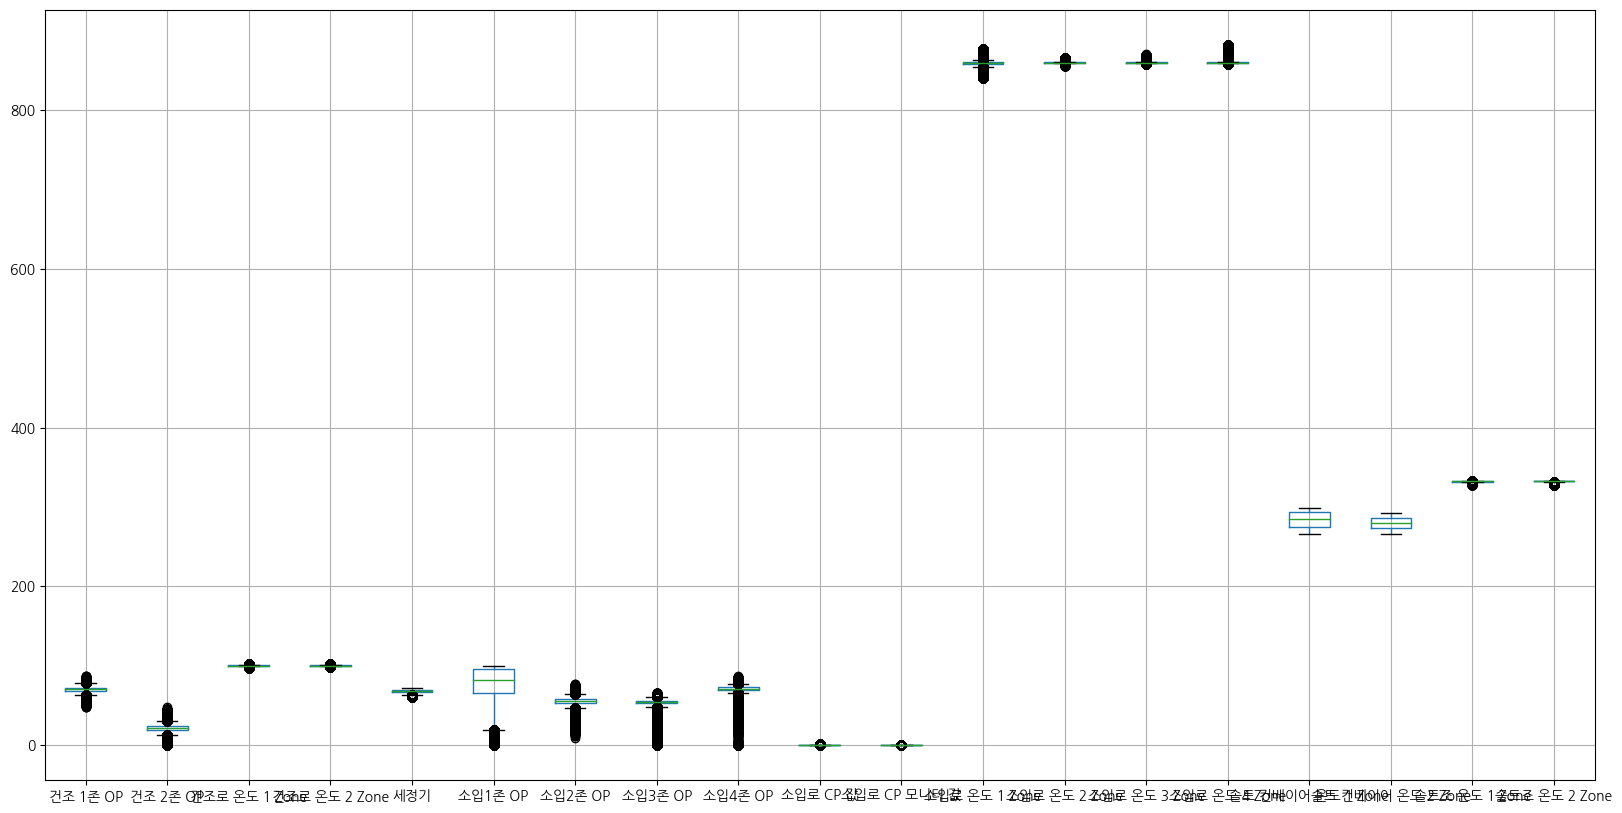

In [25]:
plt.figure(figsize=(20,10))
df1_cleaned.boxplot(column=columns)
plt.show()

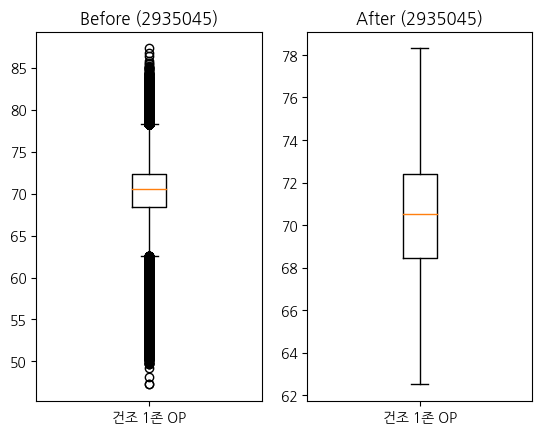

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


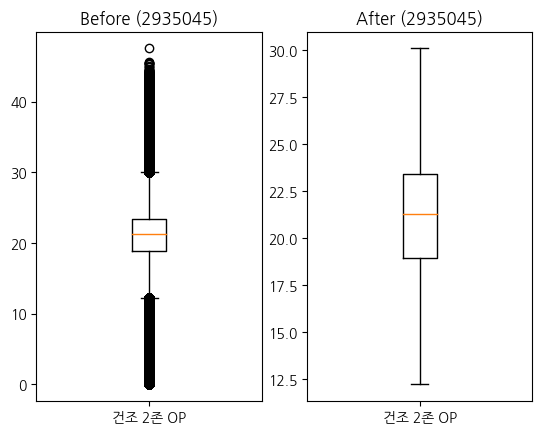

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


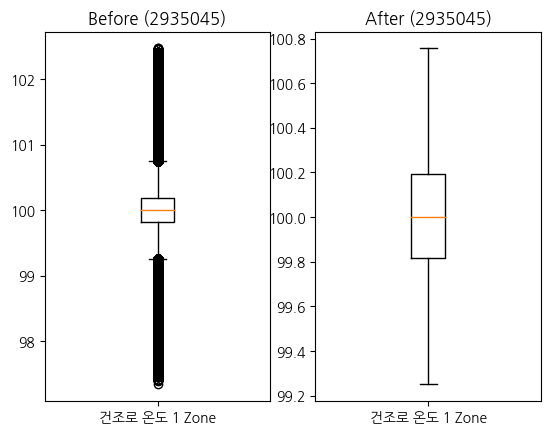

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


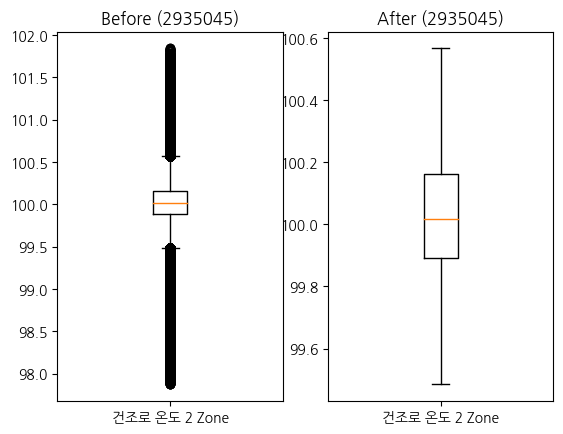

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


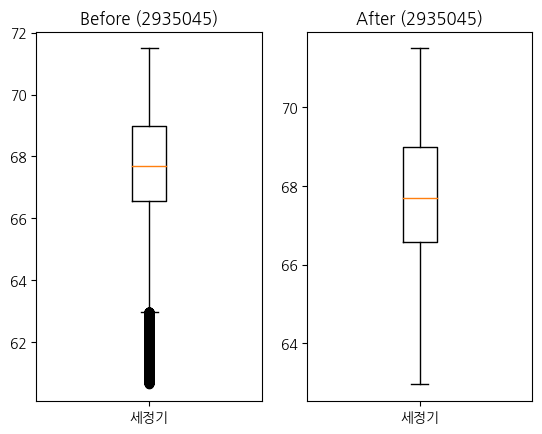

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


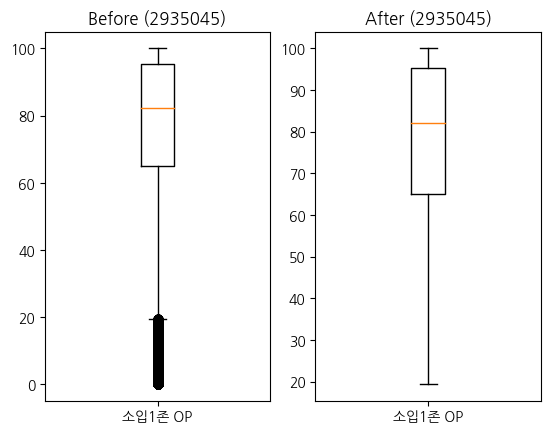

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


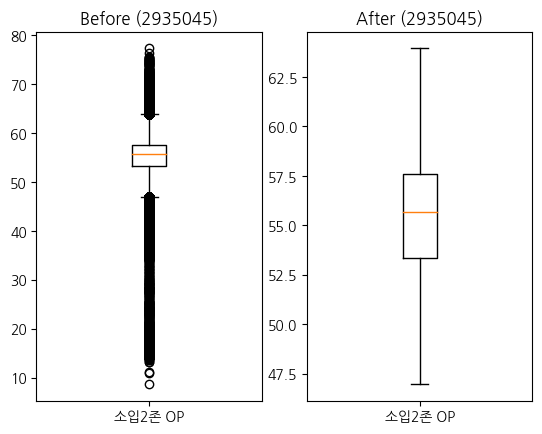

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


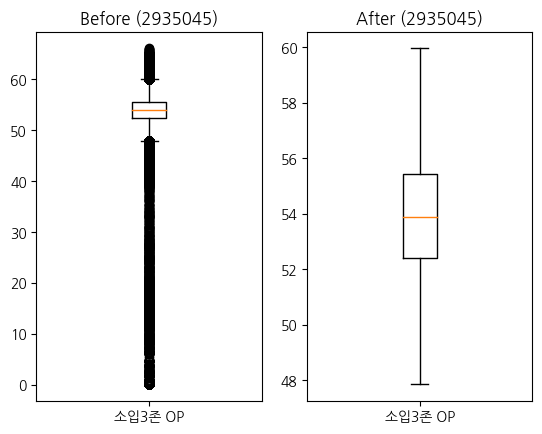

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


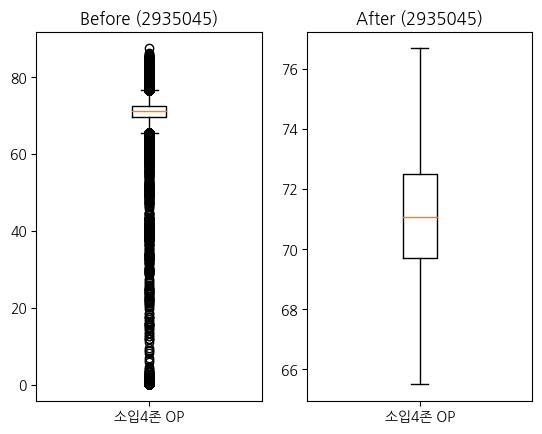

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


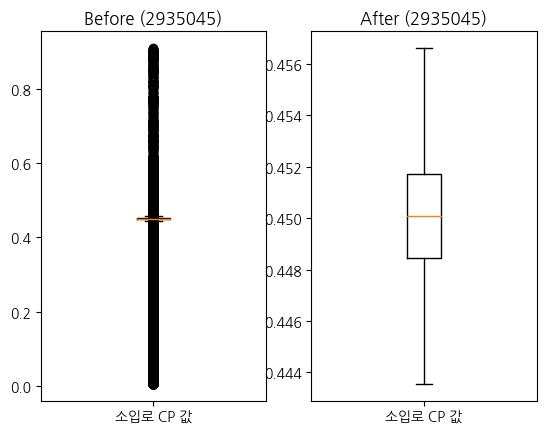

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


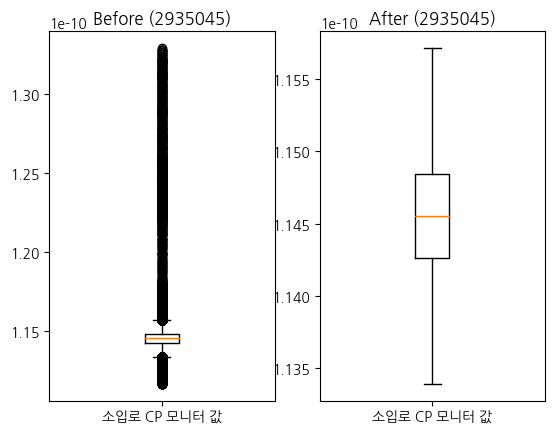

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


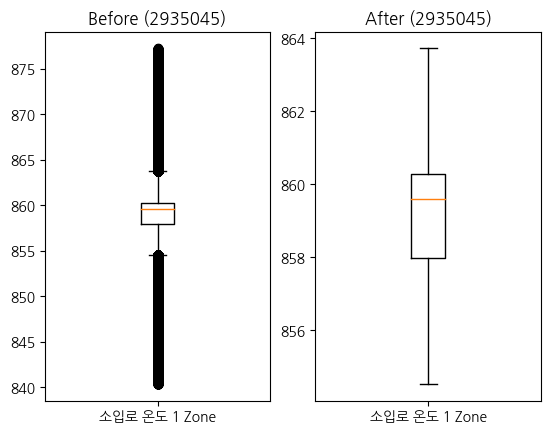

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


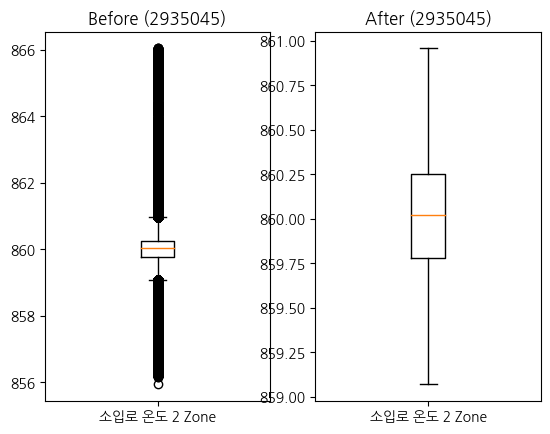

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


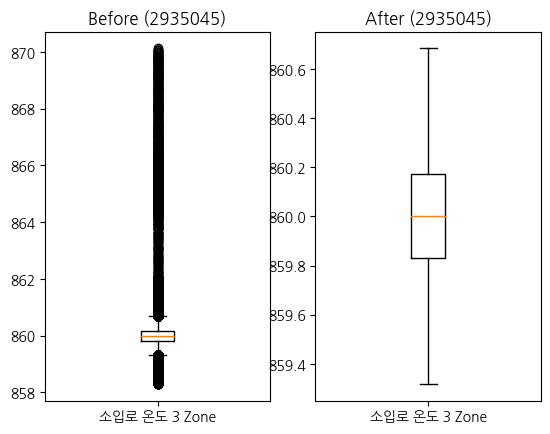

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


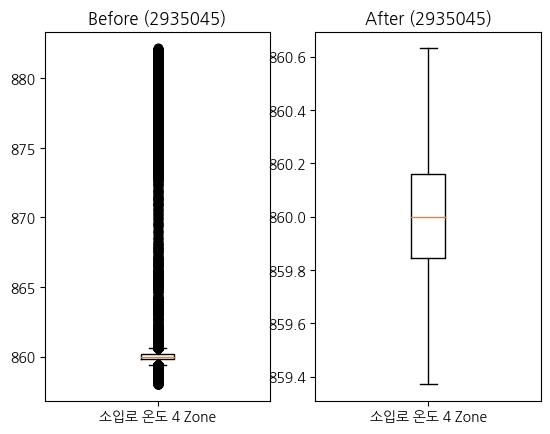

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


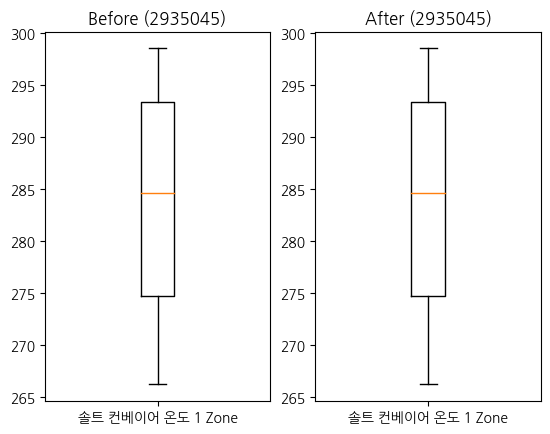

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


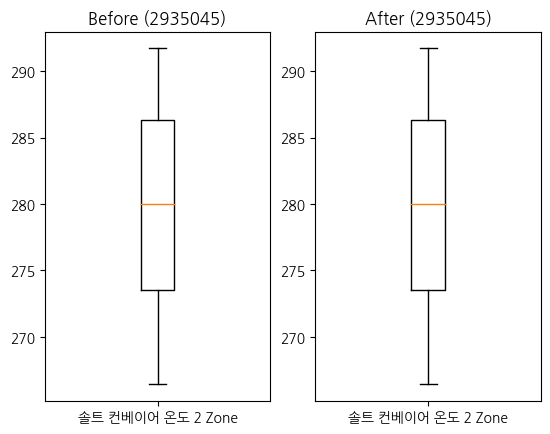

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


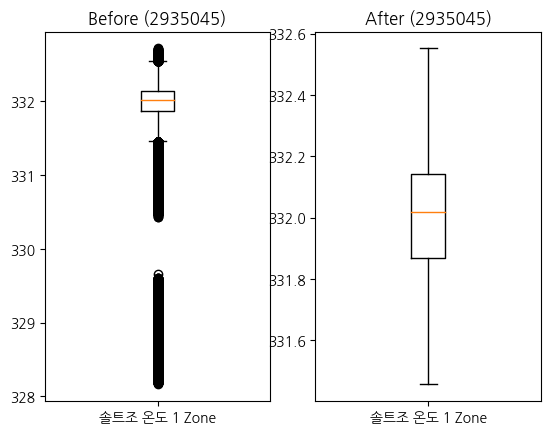

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


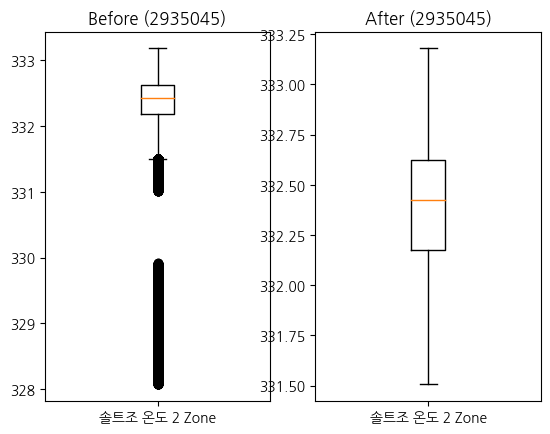

C:\Users\junoh\AppData\Local\Temp\ipykernel_12024\2521304195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = winsorized


In [26]:
# 이상치 제거 : Winsorizing 방법 선택

for col in columns:
    IQR = df1_cleaned[col].quantile(0.75) - df1_cleaned[col].quantile(0.25)
    line_down = df1_cleaned[col].quantile(0.25) - IQR*1.5
    line_up = df1_cleaned[col].quantile(0.75) + IQR*1.5

    winsorized = df1_cleaned[col].clip(line_down, line_up)

    fig, ax = plt.subplots(1,2)
    ax[0].boxplot(df1_cleaned[col], labels = [col])
    ax[0].set_title('Before (%s)'%df1_cleaned[col].shape)
    ax[1].boxplot(winsorized, labels = [col])
    ax[1].set_title('After (%s)'%winsorized.shape)

    plt.show()

    df1_cleaned[col] = winsorized

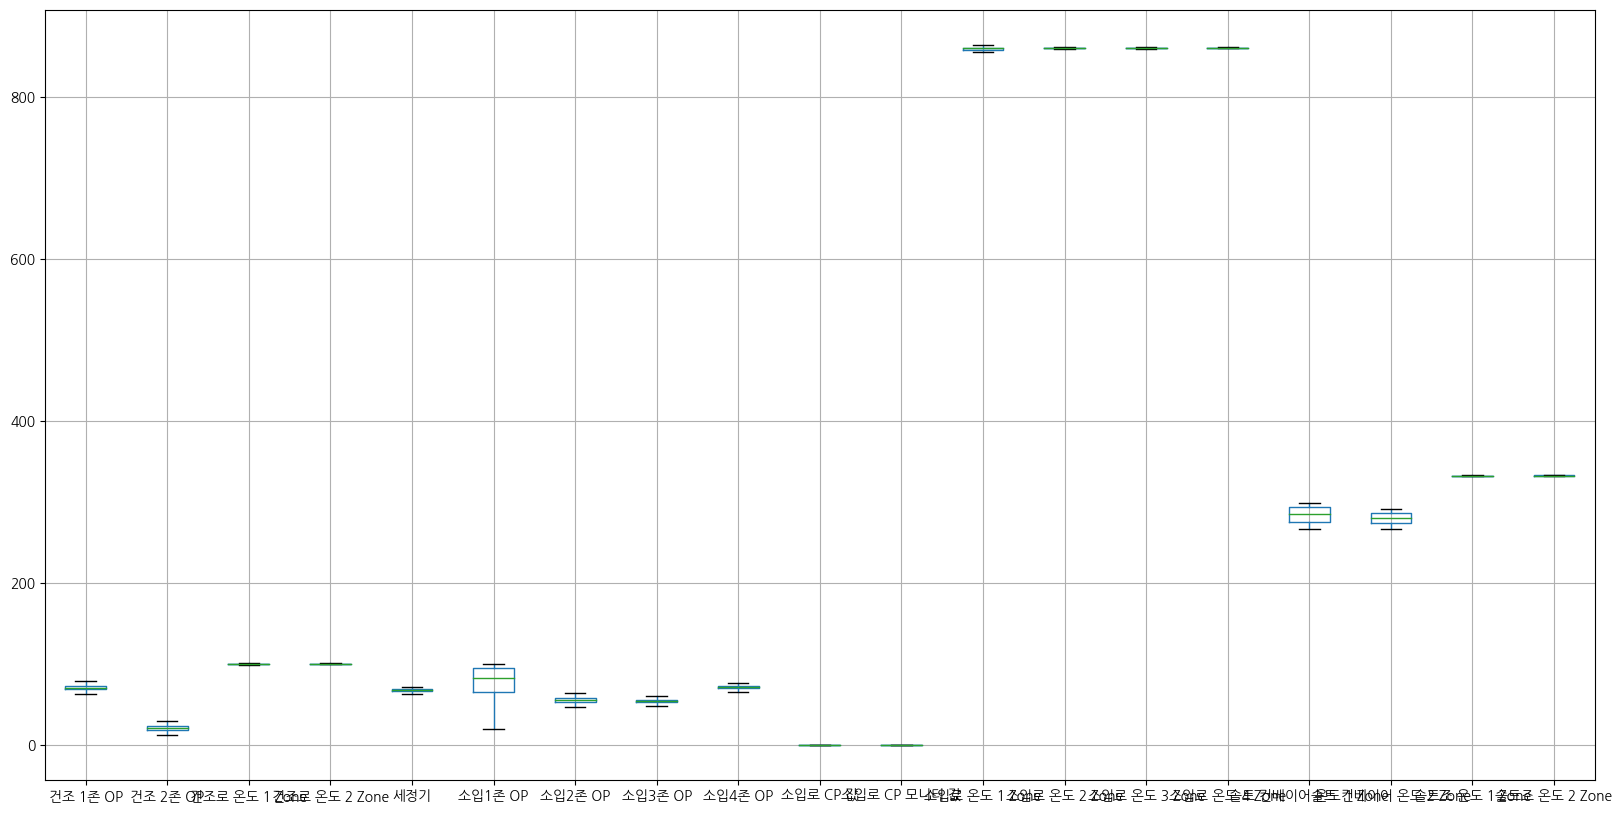

In [27]:
plt.figure(figsize=(20,10))
df1_cleaned.boxplot(column=columns)
plt.show()

In [28]:
df2 = df1_cleaned.drop(columns=['TAG_MIN'])
df2.head()

,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,소입4존 OP,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
2,102410,75.6776,30.0844,99.25,99.48425,68.4386,78.10990,61.5414,52.01960,72.0384,0.450341,1.145200e-10,860.338,859.780,859.981,859.724,294.658,272.538,331.456,331.506
3,102410,75.8656,30.0844,99.25,99.48425,68.4999,77.50725,60.6663,52.69425,73.4815,0.450201,1.144670e-10,860.338,859.842,859.950,859.599,294.719,272.538,331.456,331.506
4,102410,73.6468,29.5274,99.25,99.48425,68.4386,76.02620,61.1634,51.69150,71.6093,0.450235,1.145360e-10,860.351,859.791,859.991,859.731,294.721,272.599,331.456,331.506
5,102410,76.0051,29.5927,99.25,99.48425,68.4386,75.88260,61.1124,51.71220,71.5902,0.450448,1.145360e-10,860.351,859.791,859.991,859.731,294.721,272.599,331.456,331.506
6,102410,75.9804,29.5291,99.25,99.48425,68.4386,75.75040,59.5448,51.73110,71.5729,0.450571,1.145360e-10,860.351,859.854,859.991,859.731,294.781,272.599,331.456,331.506


In [29]:
df2_avg = df2.groupby('배정번호').mean()
df2_std = df2.groupby('배정번호').std()

In [30]:
new_column_df2_avg = ['건조 1존 OP_Avg',
 '건조 2존 OP_Avg',
 '건조로 온도 1 Zone_Avg',
 '건조로 온도 2 Zone_Avg',
 '세정기_Avg',
 '소입1존 OP_Avg',
 '소입2존 OP_Avg',
 '소입3존 OP_Avg',
 '소입4존 OP_Avg',
 '소입로 CP 값_Avg',
 '소입로 CP 모니터 값_Avg',
 '소입로 온도 1 Zone_Avg',
 '소입로 온도 2 Zone_Avg',
 '소입로 온도 3 Zone_Avg',
 '소입로 온도 4 Zone_Avg',
 '솔트 컨베이어 온도 1 Zone_Avg',
 '솔트 컨베이어 온도 2 Zone_Avg',
 '솔트조 온도 1 Zone_Avg',
 '솔트조 온도 2 Zone_Avg']

df2_avg.columns = new_column_df2_avg
df2_avg.head()

,건조 1존 OP_Avg,건조 2존 OP_Avg,건조로 온도 1 Zone_Avg,건조로 온도 2 Zone_Avg,세정기_Avg,소입1존 OP_Avg,소입2존 OP_Avg,소입3존 OP_Avg,소입4존 OP_Avg,소입로 CP 값_Avg,소입로 CP 모니터 값_Avg,소입로 온도 1 Zone_Avg,소입로 온도 2 Zone_Avg,소입로 온도 3 Zone_Avg,소입로 온도 4 Zone_Avg,솔트 컨베이어 온도 1 Zone_Avg,솔트 컨베이어 온도 2 Zone_Avg,솔트조 온도 1 Zone_Avg,솔트조 온도 2 Zone_Avg
배정번호,,,,,,,,,,,,,,,,,,,
102410,72.291260,21.251567,99.976318,100.079713,69.602877,76.709581,59.331034,50.708422,70.268492,0.450177,1.145622e-10,859.495123,860.009267,860.005792,859.979838,282.579658,280.150049,331.456,331.506
102585,72.268511,18.634030,100.000287,100.057443,69.579662,75.792736,59.180435,52.045215,70.589617,0.450098,1.145240e-10,859.254849,859.996845,859.983447,859.997629,282.964396,279.668941,331.456,331.506
102930,70.810083,20.931741,99.996724,100.023094,69.529244,71.691033,47.311133,48.622277,67.295695,0.449885,1.145433e-10,859.514670,859.983125,859.994857,860.006824,283.327384,279.311251,331.456,331.506
103142,72.455494,22.267415,100.003826,100.009354,69.536974,77.576332,47.246446,50.581203,69.437282,0.449948,1.145470e-10,859.803832,859.995482,859.996921,859.996371,282.882758,279.241057,331.456,331.506
103675,72.871986,21.940329,99.995479,100.058280,69.321409,75.748554,47.042111,50.398579,69.741016,0.449996,1.145744e-10,859.563988,859.956725,860.012764,859.979602,283.585178,277.545049,331.456,331.506


In [31]:
new_column_df2_std = ['건조 1존 OP_Std',
 '건조 2존 OP_Std',
 '건조로 온도 1 Zone_Std',
 '건조로 온도 2 Zone_Std',
 '세정기_Std',
 '소입1존 OP_Std',
 '소입2존 OP_Std',
 '소입3존 OP_Std',
 '소입4존 OP_Std',
 '소입로 CP 값_Std',
 '소입로 CP 모니터 값_Std',
 '소입로 온도 1 Zone_Std',
 '소입로 온도 2 Zone_Std',
 '소입로 온도 3 Zone_Std',
 '소입로 온도 4 Zone_Std',
 '솔트 컨베이어 온도 1 Zone_Std',
 '솔트 컨베이어 온도 2 Zone_Std',
 '솔트조 온도 1 Zone_Std',
 '솔트조 온도 2 Zone_Std']

df2_std.columns = new_column_df2_std
df2_std.head()

,건조 1존 OP_Std,건조 2존 OP_Std,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Std,세정기_Std,소입1존 OP_Std,소입2존 OP_Std,소입3존 OP_Std,소입4존 OP_Std,소입로 CP 값_Std,소입로 CP 모니터 값_Std,소입로 온도 1 Zone_Std,소입로 온도 2 Zone_Std,소입로 온도 3 Zone_Std,소입로 온도 4 Zone_Std,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Std,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Std
배정번호,,,,,,,,,,,,,,,,,,,
102410,3.193573,3.909286,0.350435,0.318775,0.845302,19.913660,1.780749,1.372045,2.258282,0.002794,4.608163e-13,2.085226,0.385128,0.271061,0.337849,9.371323,6.034029,0.0,0.0
102585,3.076042,2.424500,0.383047,0.256335,1.066804,20.925235,1.918905,1.478804,2.088528,0.002299,3.908283e-13,2.186976,0.369480,0.229953,0.342436,9.442414,7.154698,0.0,0.0
102930,2.905808,2.501378,0.341799,0.231762,1.097989,21.020114,0.899322,0.991366,1.908194,0.002912,3.986038e-13,2.117553,0.358383,0.234592,0.300332,9.679513,6.664811,0.0,0.0
103142,2.462804,2.320445,0.266320,0.172677,1.064265,14.347909,0.611145,1.217359,1.704981,0.002022,3.203493e-13,1.202217,0.246588,0.188469,0.219689,9.495650,6.537643,0.0,0.0
103675,3.447763,3.386077,0.344622,0.252718,0.991572,20.769320,0.307663,1.462890,2.368448,0.002507,4.911276e-13,2.074760,0.295628,0.289179,0.305267,9.705127,5.366741,0.0,0.0


In [32]:
df2 = pd.concat([df2_avg, df2_std], axis = 1)
df2.head()

,건조 1존 OP_Avg,건조 2존 OP_Avg,건조로 온도 1 Zone_Avg,건조로 온도 2 Zone_Avg,세정기_Avg,소입1존 OP_Avg,소입2존 OP_Avg,소입3존 OP_Avg,소입4존 OP_Avg,소입로 CP 값_Avg,...,소입로 CP 값_Std,소입로 CP 모니터 값_Std,소입로 온도 1 Zone_Std,소입로 온도 2 Zone_Std,소입로 온도 3 Zone_Std,소입로 온도 4 Zone_Std,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Std,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Std
배정번호,,,,,,,,,,,,,,,,,,,,,
102410,72.291260,21.251567,99.976318,100.079713,69.602877,76.709581,59.331034,50.708422,70.268492,0.450177,...,0.002794,4.608163e-13,2.085226,0.385128,0.271061,0.337849,9.371323,6.034029,0.0,0.0
102585,72.268511,18.634030,100.000287,100.057443,69.579662,75.792736,59.180435,52.045215,70.589617,0.450098,...,0.002299,3.908283e-13,2.186976,0.369480,0.229953,0.342436,9.442414,7.154698,0.0,0.0
102930,70.810083,20.931741,99.996724,100.023094,69.529244,71.691033,47.311133,48.622277,67.295695,0.449885,...,0.002912,3.986038e-13,2.117553,0.358383,0.234592,0.300332,9.679513,6.664811,0.0,0.0
103142,72.455494,22.267415,100.003826,100.009354,69.536974,77.576332,47.246446,50.581203,69.437282,0.449948,...,0.002022,3.203493e-13,1.202217,0.246588,0.188469,0.219689,9.495650,6.537643,0.0,0.0
103675,72.871986,21.940329,99.995479,100.058280,69.321409,75.748554,47.042111,50.398579,69.741016,0.449996,...,0.002507,4.911276e-13,2.074760,0.295628,0.289179,0.305267,9.705127,5.366741,0.0,0.0


In [33]:
df2 = df2.sort_index(axis=1)
df2.head()

,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,세정기_Avg,세정기_Std,...,소입로 온도 4 Zone_Avg,소입로 온도 4 Zone_Std,솔트 컨베이어 온도 1 Zone_Avg,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std
배정번호,,,,,,,,,,,,,,,,,,,,,
102410,72.291260,3.193573,21.251567,3.909286,99.976318,0.350435,100.079713,0.318775,69.602877,0.845302,...,859.979838,0.337849,282.579658,9.371323,280.150049,6.034029,331.456,0.0,331.506,0.0
102585,72.268511,3.076042,18.634030,2.424500,100.000287,0.383047,100.057443,0.256335,69.579662,1.066804,...,859.997629,0.342436,282.964396,9.442414,279.668941,7.154698,331.456,0.0,331.506,0.0
102930,70.810083,2.905808,20.931741,2.501378,99.996724,0.341799,100.023094,0.231762,69.529244,1.097989,...,860.006824,0.300332,283.327384,9.679513,279.311251,6.664811,331.456,0.0,331.506,0.0
103142,72.455494,2.462804,22.267415,2.320445,100.003826,0.266320,100.009354,0.172677,69.536974,1.064265,...,859.996371,0.219689,282.882758,9.495650,279.241057,6.537643,331.456,0.0,331.506,0.0
103675,72.871986,3.447763,21.940329,3.386077,99.995479,0.344622,100.058280,0.252718,69.321409,0.991572,...,859.979602,0.305267,283.585178,9.705127,277.545049,5.366741,331.456,0.0,331.506,0.0


In [34]:
df2 = df2.drop(columns=[ '소입로 CP 모니터 값_Avg',
 '소입로 CP 모니터 값_Std'])
df2.head()

,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,세정기_Avg,세정기_Std,...,소입로 온도 4 Zone_Avg,소입로 온도 4 Zone_Std,솔트 컨베이어 온도 1 Zone_Avg,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std
배정번호,,,,,,,,,,,,,,,,,,,,,
102410,72.291260,3.193573,21.251567,3.909286,99.976318,0.350435,100.079713,0.318775,69.602877,0.845302,...,859.979838,0.337849,282.579658,9.371323,280.150049,6.034029,331.456,0.0,331.506,0.0
102585,72.268511,3.076042,18.634030,2.424500,100.000287,0.383047,100.057443,0.256335,69.579662,1.066804,...,859.997629,0.342436,282.964396,9.442414,279.668941,7.154698,331.456,0.0,331.506,0.0
102930,70.810083,2.905808,20.931741,2.501378,99.996724,0.341799,100.023094,0.231762,69.529244,1.097989,...,860.006824,0.300332,283.327384,9.679513,279.311251,6.664811,331.456,0.0,331.506,0.0
103142,72.455494,2.462804,22.267415,2.320445,100.003826,0.266320,100.009354,0.172677,69.536974,1.064265,...,859.996371,0.219689,282.882758,9.495650,279.241057,6.537643,331.456,0.0,331.506,0.0
103675,72.871986,3.447763,21.940329,3.386077,99.995479,0.344622,100.058280,0.252718,69.321409,0.991572,...,859.979602,0.305267,283.585178,9.705127,277.545049,5.366741,331.456,0.0,331.506,0.0


In [35]:
# 파생변수 생성 1 : 공정별 평균값 및 최대갑, 최소값

# 파생변수 생성 : 공정별  range(Max-Min)
df2['건조 존 OP_Range'] = (df2['건조 1존 OP_Avg']+df2['건조 2존 OP_Avg']) / 2    

df2['건조로 온도 Zone_Range']=(df2['건조로 온도 1 Zone_Avg']+df2['건조로 온도 2 Zone_Avg']) / 2 

df2['소입 존 OP_Min'] = df2[['소입1존 OP_Avg','소입2존 OP_Avg','소입3존 OP_Avg','소입4존 OP_Avg']].min(axis=1)
df2['소입 존 OP_Max'] = df2[['소입1존 OP_Avg','소입2존 OP_Avg','소입3존 OP_Avg','소입4존 OP_Avg']].max(axis=1)
df2['소입 존 OP_Range'] = np.abs(df2['소입 존 OP_Max'] - df2['소입 존 OP_Min'])

df2['소입로 온도 Zone_Min'] = df2[['소입로 온도 1 Zone_Avg','소입로 온도 2 Zone_Avg','소입로 온도 3 Zone_Avg','소입로 온도 4 Zone_Avg']].min(axis=1)
df2['소입로 온도 Zone_Max'] = df2[['소입로 온도 1 Zone_Avg','소입로 온도 2 Zone_Avg','소입로 온도 3 Zone_Avg','소입로 온도 4 Zone_Avg']].max(axis=1)
df2['소입로 온도 Zone_Range'] = np.abs(df2['소입로 온도 Zone_Max'] - df2['소입로 온도 Zone_Min'])

df2['솔트 컨베이어 온도 Zone_Range'] = (df2['솔트 컨베이어 온도 1 Zone_Avg']+df2['솔트 컨베이어 온도 2 Zone_Avg']) / 2    

df2['솔트조 온도 Zone_Range']=(df2['솔트조 온도 1 Zone_Avg']+df2['솔트조 온도 2 Zone_Avg']) / 2 

df2.head()

,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,세정기_Avg,세정기_Std,...,건조 존 OP_Range,건조로 온도 Zone_Range,소입 존 OP_Min,소입 존 OP_Max,소입 존 OP_Range,소입로 온도 Zone_Min,소입로 온도 Zone_Max,소입로 온도 Zone_Range,솔트 컨베이어 온도 Zone_Range,솔트조 온도 Zone_Range
배정번호,,,,,,,,,,,,,,,,,,,,,
102410,72.291260,3.193573,21.251567,3.909286,99.976318,0.350435,100.079713,0.318775,69.602877,0.845302,...,46.771413,100.028016,50.708422,76.709581,26.001159,859.495123,860.009267,0.514144,281.364854,331.481
102585,72.268511,3.076042,18.634030,2.424500,100.000287,0.383047,100.057443,0.256335,69.579662,1.066804,...,45.451270,100.028865,52.045215,75.792736,23.747521,859.254849,859.997629,0.742780,281.316668,331.481
102930,70.810083,2.905808,20.931741,2.501378,99.996724,0.341799,100.023094,0.231762,69.529244,1.097989,...,45.870912,100.009909,47.311133,71.691033,24.379900,859.514670,860.006824,0.492154,281.319317,331.481
103142,72.455494,2.462804,22.267415,2.320445,100.003826,0.266320,100.009354,0.172677,69.536974,1.064265,...,47.361455,100.006590,47.246446,77.576332,30.329886,859.803832,859.996921,0.193089,281.061907,331.481
103675,72.871986,3.447763,21.940329,3.386077,99.995479,0.344622,100.058280,0.252718,69.321409,0.991572,...,47.406157,100.026879,47.042111,75.748554,28.706443,859.563988,860.012764,0.448776,280.565114,331.481


In [36]:
df2 = df2.sort_index(axis=1)
df2.head()

,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조 존 OP_Range,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,건조로 온도 Zone_Range,...,솔트 컨베이어 온도 1 Zone_Avg,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트 컨베이어 온도 Zone_Range,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std,솔트조 온도 Zone_Range
배정번호,,,,,,,,,,,,,,,,,,,,,
102410,72.291260,3.193573,21.251567,3.909286,46.771413,99.976318,0.350435,100.079713,0.318775,100.028016,...,282.579658,9.371323,280.150049,6.034029,281.364854,331.456,0.0,331.506,0.0,331.481
102585,72.268511,3.076042,18.634030,2.424500,45.451270,100.000287,0.383047,100.057443,0.256335,100.028865,...,282.964396,9.442414,279.668941,7.154698,281.316668,331.456,0.0,331.506,0.0,331.481
102930,70.810083,2.905808,20.931741,2.501378,45.870912,99.996724,0.341799,100.023094,0.231762,100.009909,...,283.327384,9.679513,279.311251,6.664811,281.319317,331.456,0.0,331.506,0.0,331.481
103142,72.455494,2.462804,22.267415,2.320445,47.361455,100.003826,0.266320,100.009354,0.172677,100.006590,...,282.882758,9.495650,279.241057,6.537643,281.061907,331.456,0.0,331.506,0.0,331.481
103675,72.871986,3.447763,21.940329,3.386077,47.406157,99.995479,0.344622,100.058280,0.252718,100.026879,...,283.585178,9.705127,277.545049,5.366741,280.565114,331.456,0.0,331.506,0.0,331.481


In [37]:
# Min-Max Normalization

columns = list(df2.columns)

for col in columns:
    df2[col] = minmax_scaling(df2[col])

df2.head()


,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조 존 OP_Range,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,건조로 온도 Zone_Range,...,솔트 컨베이어 온도 1 Zone_Avg,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트 컨베이어 온도 Zone_Range,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std,솔트조 온도 Zone_Range
배정번호,,,,,,,,,,,,,,,,,,,,,
102410,0.786535,0.664435,0.509070,0.746220,0.585906,0.864163,0.633814,0.831101,0.790773,0.881421,...,0.326047,0.909173,0.256699,0.821072,0.183726,0.000000e+00,0.0,0.0,0.0,0.000000e+00
102585,0.784317,0.620819,0.361641,0.462507,0.485655,0.898361,0.709884,0.800018,0.635879,0.882668,...,0.393222,0.917355,0.209290,0.987068,0.175539,6.897146e-14,0.0,0.0,0.0,5.650913e-14
102930,0.642137,0.557645,0.491056,0.477197,0.517523,0.893277,0.613672,0.752076,0.574922,0.854847,...,0.456599,0.944642,0.174043,0.914505,0.175989,6.897146e-14,0.0,0.0,0.0,5.650913e-14
103142,0.802546,0.393244,0.566286,0.442624,0.630714,0.903410,0.437613,0.732898,0.428353,0.849975,...,0.378968,0.923482,0.167126,0.895669,0.132254,0.000000e+00,0.0,0.0,0.0,0.000000e+00
103675,0.843149,0.758766,0.547863,0.646245,0.634108,0.891500,0.620257,0.801186,0.626909,0.879753,...,0.501610,0.947590,0.000000,0.722233,0.047846,0.000000e+00,0.0,0.0,0.0,0.000000e+00


### Supervised Learning for Data 파일

##### 1. XGBoost


In [38]:
df2_xgb = df2
y_result = xgb.predict(df2_xgb)

c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\junoh\anaconda3\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [39]:
print(y_result)
df2_xgb['Result']=y_result
df2_xgb.head()


[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1
 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0
 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1]


,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조 존 OP_Range,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,건조로 온도 Zone_Range,...,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트 컨베이어 온도 Zone_Range,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std,솔트조 온도 Zone_Range,Result
배정번호,,,,,,,,,,,,,,,,,,,,,
102410,0.786535,0.664435,0.509070,0.746220,0.585906,0.864163,0.633814,0.831101,0.790773,0.881421,...,0.909173,0.256699,0.821072,0.183726,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1
102585,0.784317,0.620819,0.361641,0.462507,0.485655,0.898361,0.709884,0.800018,0.635879,0.882668,...,0.917355,0.209290,0.987068,0.175539,6.897146e-14,0.0,0.0,0.0,5.650913e-14,1
102930,0.642137,0.557645,0.491056,0.477197,0.517523,0.893277,0.613672,0.752076,0.574922,0.854847,...,0.944642,0.174043,0.914505,0.175989,6.897146e-14,0.0,0.0,0.0,5.650913e-14,1
103142,0.802546,0.393244,0.566286,0.442624,0.630714,0.903410,0.437613,0.732898,0.428353,0.849975,...,0.923482,0.167126,0.895669,0.132254,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1
103675,0.843149,0.758766,0.547863,0.646245,0.634108,0.891500,0.620257,0.801186,0.626909,0.879753,...,0.947590,0.000000,0.722233,0.047846,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0


##### 2. Random Forest

In [40]:
df2_rf = df2.drop(columns=['Result'])
y_pred = rf.predict(df2_rf)



In [41]:
print(y_result)
df2_rf['Result']=y_result
df2_rf.head()

[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1
 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0
 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1]


,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조 존 OP_Range,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,건조로 온도 Zone_Range,...,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트 컨베이어 온도 Zone_Range,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std,솔트조 온도 Zone_Range,Result
배정번호,,,,,,,,,,,,,,,,,,,,,
102410,0.786535,0.664435,0.509070,0.746220,0.585906,0.864163,0.633814,0.831101,0.790773,0.881421,...,0.909173,0.256699,0.821072,0.183726,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1
102585,0.784317,0.620819,0.361641,0.462507,0.485655,0.898361,0.709884,0.800018,0.635879,0.882668,...,0.917355,0.209290,0.987068,0.175539,6.897146e-14,0.0,0.0,0.0,5.650913e-14,1
102930,0.642137,0.557645,0.491056,0.477197,0.517523,0.893277,0.613672,0.752076,0.574922,0.854847,...,0.944642,0.174043,0.914505,0.175989,6.897146e-14,0.0,0.0,0.0,5.650913e-14,1
103142,0.802546,0.393244,0.566286,0.442624,0.630714,0.903410,0.437613,0.732898,0.428353,0.849975,...,0.923482,0.167126,0.895669,0.132254,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1
103675,0.843149,0.758766,0.547863,0.646245,0.634108,0.891500,0.620257,0.801186,0.626909,0.879753,...,0.947590,0.000000,0.722233,0.047846,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0


In [42]:
import shap

In [43]:
df2.head()

,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조 존 OP_Range,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,건조로 온도 Zone_Range,...,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트 컨베이어 온도 Zone_Range,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std,솔트조 온도 Zone_Range,Result
배정번호,,,,,,,,,,,,,,,,,,,,,
102410,0.786535,0.664435,0.509070,0.746220,0.585906,0.864163,0.633814,0.831101,0.790773,0.881421,...,0.909173,0.256699,0.821072,0.183726,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1
102585,0.784317,0.620819,0.361641,0.462507,0.485655,0.898361,0.709884,0.800018,0.635879,0.882668,...,0.917355,0.209290,0.987068,0.175539,6.897146e-14,0.0,0.0,0.0,5.650913e-14,1
102930,0.642137,0.557645,0.491056,0.477197,0.517523,0.893277,0.613672,0.752076,0.574922,0.854847,...,0.944642,0.174043,0.914505,0.175989,6.897146e-14,0.0,0.0,0.0,5.650913e-14,1
103142,0.802546,0.393244,0.566286,0.442624,0.630714,0.903410,0.437613,0.732898,0.428353,0.849975,...,0.923482,0.167126,0.895669,0.132254,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1
103675,0.843149,0.758766,0.547863,0.646245,0.634108,0.891500,0.620257,0.801186,0.626909,0.879753,...,0.947590,0.000000,0.722233,0.047846,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0


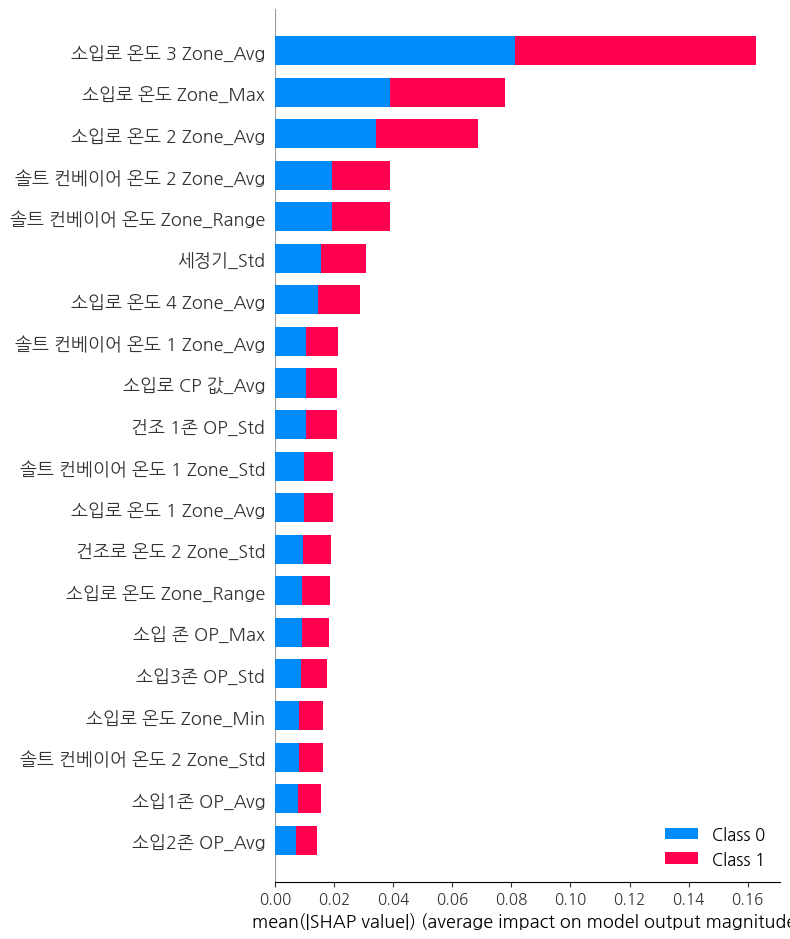

In [57]:
y= df2['Result']
X = df2.drop(columns=['Result'])

rf1 = RandomForestClassifier(n_estimators=150, random_state=1)
rf1.fit(X,y)

explainer = shap.TreeExplainer(rf1)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, plot_type='bar')





* Impact가 가장 높은 상위 7개 변수 선택 

#### SHAP Value 결과 상위 7개 변수에 대해 Train 데이터 모델 학습 

In [58]:
tr.head()

,target,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조 존 OP_Range,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,...,솔트 컨베이어 온도 1 Zone_Avg,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트 컨베이어 온도 Zone_Range,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std,솔트조 온도 Zone_Range
0,1,0.569962,0.496876,0.590996,0.358522,0.520637,0.797688,0.524629,0.821015,0.503536,...,0.684869,0.970734,0.285589,0.952479,0.373929,0.950910,0.233190,0.967306,0.272173,0.979130
1,0,0.507540,0.570696,0.451521,0.469530,0.386313,0.897399,0.464059,0.897542,0.347762,...,0.740604,0.927473,0.308976,0.905801,0.421689,0.954375,0.402425,0.809299,0.686954,0.894801
2,1,0.916707,0.327461,0.624649,0.147872,0.667820,0.807165,0.454843,0.814924,0.333275,...,0.398625,0.949809,0.155998,0.811265,0.120265,0.971678,0.111699,0.889374,0.165280,0.946670
3,1,0.445710,0.541195,0.000000,0.397687,0.000000,0.849998,0.499919,0.920961,0.408601,...,0.752858,0.955719,0.323252,0.913615,0.440266,0.999235,0.163311,0.852172,0.345264,0.939631
4,1,0.511314,0.677934,0.575860,0.404000,0.488110,0.890005,0.425678,0.890553,0.348044,...,0.588140,1.000000,0.203446,0.898745,0.254301,0.902183,0.317805,0.913837,0.756166,0.926680


##### Train/Test 데이터 분할

In [63]:
tr_columns = ['소입로 온도 3 Zone_Avg','소입로 온도 Zone_Max','소입로 온도 2 Zone_Avg','솔트 컨베이어 온도 2 Zone_Avg',
              '솔트 컨베이어 온도 Zone_Range','세정기_Std','소입로 온도 4 Zone_Avg']

X_shap = tr[tr_columns]
X_shap.head()

y_shap = tr['target']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_shap, y_shap, test_size=0.2, random_state= 2)
print("# X_train 데이터 크기: ",X_train.shape)
print("# y_train 데이터 크기: ",y_train.shape)


# X_train 데이터 크기:  (86, 7)
# y_train 데이터 크기:  (86,)


##### SMOTE 2회 실행

In [71]:
from imblearn.over_sampling import SMOTE

# 모델 설정
sm = SMOTE(sampling_strategy='auto', random_state = 10)

# SMOTE 실행 횟수 설정
n_iter = 2

for _ in range(n_iter):

    print('##### SMOTE {}회 실행 결과 #####'.format(_+1))
    print('# Before OverSampling, 데이터 Shpae:', X_train.shape, y_train.shape)

    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print('# After OverSampling, 데이터 Shpae:', X_train_sm.shape, y_train_sm.shape)
    print('# After SMOTE 적용 후 레이블값 분포 :\n\n\n', pd.Series(y_train_sm).value_counts())

        # 새 합성데이터를 원본데이터에 추가
    X_train = pd.concat([X_train, pd.DataFrame(X_train_sm)], ignore_index=True)
    y_train = pd.concat([y_train, pd.Series(y_train_sm)], ignore_index=True)

##### SMOTE 1회 실행 결과 #####
# Before OverSampling, 데이터 Shpae: (86, 7) (86,)
# After OverSampling, 데이터 Shpae: (128, 7) (128,)
# After SMOTE 적용 후 레이블값 분포 :


 target
0    64
1    64
Name: count, dtype: int64
##### SMOTE 2회 실행 결과 #####
# Before OverSampling, 데이터 Shpae: (214, 7) (214,)
# After OverSampling, 데이터 Shpae: (256, 7) (256,)
# After SMOTE 적용 후 레이블값 분포 :


 target
0    128
1    128
Name: count, dtype: int64


##### Random Forest 실행

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf2 = RandomForestClassifier()

param_grid = {
    'n_estimators':[100,150,200],
    'max_depth':[None, 10, 20 ,30],
    'min_samples_split':[2,5,10,],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=3,n_jobs=1, verbose=2 )

grid_search.fit(X_train, y_train)

print('최적의 하이머파라미터:')
print(grid_search.best_params_)

best_rf2 = grid_search.best_estimator_

accuracy = best_rf2.score(X_test, y_test)
print('# Accurach:', accuracy)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2


324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\junoh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\junoh\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\junoh\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\junoh\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParam

##### XGboost 실행

In [74]:
import xgboost as xgb1

xgb_model = xgb1.XGBClassifier()

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print('최적의 하이머파라미터:')
print(grid_search.best_params_)

best_xgb1 = grid_search.best_estimator_

accuracy = best_xgb1.score(X_test, y_test)
print('# Accuracy:', accuracy)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
최적의 하이머파라미터:
{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 150}
# Accuracy: 0.6363636363636364


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecat

* RandomForest Accuracy : 0.68
* XGboost Accuracy : 0.63
* RandomForest 모델 선택

### data.csv 데이터 모델 예측 (RandomForest)

In [75]:
df2.head()

,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조 존 OP_Range,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,건조로 온도 Zone_Range,...,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트 컨베이어 온도 Zone_Range,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std,솔트조 온도 Zone_Range,Result
배정번호,,,,,,,,,,,,,,,,,,,,,
102410,0.786535,0.664435,0.509070,0.746220,0.585906,0.864163,0.633814,0.831101,0.790773,0.881421,...,0.909173,0.256699,0.821072,0.183726,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1
102585,0.784317,0.620819,0.361641,0.462507,0.485655,0.898361,0.709884,0.800018,0.635879,0.882668,...,0.917355,0.209290,0.987068,0.175539,6.897146e-14,0.0,0.0,0.0,5.650913e-14,1
102930,0.642137,0.557645,0.491056,0.477197,0.517523,0.893277,0.613672,0.752076,0.574922,0.854847,...,0.944642,0.174043,0.914505,0.175989,6.897146e-14,0.0,0.0,0.0,5.650913e-14,1
103142,0.802546,0.393244,0.566286,0.442624,0.630714,0.903410,0.437613,0.732898,0.428353,0.849975,...,0.923482,0.167126,0.895669,0.132254,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1
103675,0.843149,0.758766,0.547863,0.646245,0.634108,0.891500,0.620257,0.801186,0.626909,0.879753,...,0.947590,0.000000,0.722233,0.047846,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0


In [76]:
df2_columns = ['소입로 온도 3 Zone_Avg','소입로 온도 Zone_Max','소입로 온도 2 Zone_Avg','솔트 컨베이어 온도 2 Zone_Avg',
              '솔트 컨베이어 온도 Zone_Range','세정기_Std','소입로 온도 4 Zone_Avg']

df3 = df2[df2_columns]
df3.head()

,소입로 온도 3 Zone_Avg,소입로 온도 Zone_Max,소입로 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 Zone_Range,세정기_Std,소입로 온도 4 Zone_Avg
배정번호,,,,,,,
102410,0.280177,0.107926,0.508842,0.256699,0.183726,0.422358,0.121298
102585,0.202643,0.066107,0.439813,0.209290,0.175539,0.540911,0.177593
102930,0.242234,0.099146,0.363568,0.174043,0.175989,0.557602,0.206688
103142,0.249397,0.063564,0.432238,0.167126,0.132254,0.539552,0.173612
103675,0.304371,0.120493,0.216856,0.000000,0.047846,0.500645,0.120550


##### RandomForest 실행

In [81]:
# train data 훈련 실행

rf2 = RandomForestClassifier(max_depth= None, max_features= 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rf2.fit(X_train, y_train)

# data.csv 예측
y_pred = rf2.predict(df3)

df3['Result'] = y_pred

y_pred
df3.head()



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,소입로 온도 3 Zone_Avg,소입로 온도 Zone_Max,소입로 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 Zone_Range,세정기_Std,소입로 온도 4 Zone_Avg,Result
배정번호,,,,,,,,
102410,0.280177,0.107926,0.508842,0.256699,0.183726,0.422358,0.121298,1
102585,0.202643,0.066107,0.439813,0.209290,0.175539,0.540911,0.177593,1
102930,0.242234,0.099146,0.363568,0.174043,0.175989,0.557602,0.206688,1
103142,0.249397,0.063564,0.432238,0.167126,0.132254,0.539552,0.173612,1
103675,0.304371,0.120493,0.216856,0.000000,0.047846,0.500645,0.120550,1


In [82]:
df3.to_csv('data_smote_rf.csv', encoding='cp949')